In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools
import math
from scipy import stats
from scipy.stats import beta

In [6]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

#plotの文字定義
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'

# 最も近い値の算出
def getNearest(list, num):
    """
    概要: リストからある値に最も近い値を返却する関数
    @param list: データ配列
    @param num: 対象値
    @return 対象値に最も近い値
    """

    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(list) - num).argmin()
    return idx

In [7]:
dt = 0.01
t_end=1
len_t = int(t_end/dt)
# tt_end=1.5
# len_tt = int(tt_end/dt)
print (len_t)
# p = 1
# # h=1
# a=3
# u=0.0001
# k=3

100


12012.0
101


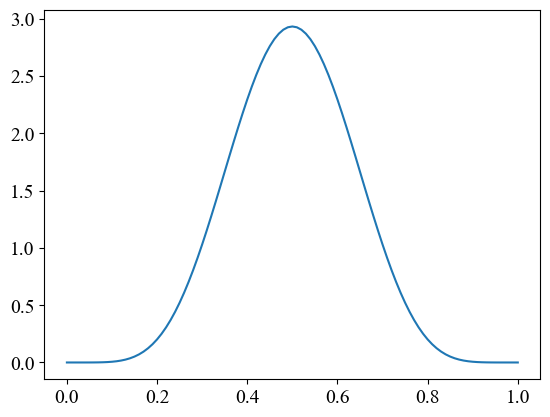

In [8]:
# h0_list = [0.61]
t3_list=[0]

# h0 = 0

a1 = 7
b1 = 7
t3_list = np.linspace(0, 1, len_t+1) #x軸
h0_list = 0.000001+beta.pdf(t3_list, a1, b1)      #y軸
z=math.factorial(a1+b1-1)/(math.factorial(a1-1)*math.factorial(b1-1))

plt.plot(t3_list, h0_list)
plt.savefig("h.png")
print(z)
print(len(h0_list))


In [9]:
#Caliculate V and s
#initial value
# p = 1
p_list=[i / 10 for i in range(0, 51, 1)]
len_p=len(p_list)
# h=1
x_list=[i / 10 for i in range(0, 51, 1)]
len_x=len(x_list)
u=0.01
a=8
# a_list=[i / 10 for i in range(2, 161, 2)]
# len_a=len(a_list)
k=4
# k_list=[i / 10 for i in range(2, 101, 2)]
# len_k=len(k_list)
masu=len_p*len_x
df_t1 = pd.DataFrame(np.arange(masu).reshape(len_p, len_x),columns=x_list,index=p_list)
df_t2 = pd.DataFrame(np.arange(masu).reshape(len_p, len_x),columns=x_list,index=p_list)
df_tbar = pd.DataFrame(np.arange(masu).reshape(len_p, len_x),columns=x_list,index=p_list)
df_s = pd.DataFrame(np.arange(masu).reshape(len_p, len_x),columns=x_list,index=p_list)

t1_t_list=[i / 100 for i in range(0, 51, 1)]
# t1_t_list=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# t1_t_list=[0, 0.1, 0.2, 0.3, 0.4, 0.5]
# print(t1_t_list)
len_t1=len(t1_t_list)

# print (len_t1)
for n in range(len_x):
    
    for m in range(len_p):

        sa_list=[]
        sign_list=[]
        t2_t_list=[]
        l_t2_list=[]
        lamv_t2_list=[]
        s_lis_list=[]
        s_total_list=[]
        
        x=x_list[n]
        p=p_list[m]
        for j in range(len_t1):
            if n==0:
                break
            # print(j)
            t1 = t1_t_list[j]
            t2=1000
            # print(t1)
            # lam = 1/(b*h)

            #list
            # s_list =[s]
            # lam_list = [lam]
            s_list = [0]
            t_list = [0]
            v_list = [0]
            s_total=0

            for i in range(len_t):

                t = dt*(i + 1)
                t_list.append(t)
                # if i<=len_t:
                #     h = h0_list[i]
                # else:
                #     h=1
                h = x*h0_list[i+1]
                v = v_list[-1]

                kata1 = h/(2*(1+a*v)*(k+u))
                kata2 = -p+k*v
                kata3 = u+(h/(1+a*v))
                kata4 = pow(1+a*v, 2)/(h*a)
                kata5 = k+u+(h/(1+a*v))
                kata6 = (k+u)/h
                kata7 = z*(((a1-1)*pow(t,a1-2)*pow(1-t,b1-1))-((b1-1)*pow(t,a1-1)*pow(1-t,b1-2)))
                dv = kata1*(kata2+kata3*kata4*kata5+kata4*kata6*kata7)
                v1 = v + dv*dt
                s = dv - k*v1
                if s <= 0:
                    if i < t2:
                        t2=i
                    s_list.append(0)
                    v1 = v-k*v*dt
                    v_list.append(v1)
                elif t<t1:
                    s_list.append(0)
                    v_list.append(0)
                elif i==len_t-1:
                    s_list.append(0)
                    v1 = v-k*v*dt
                    v_list.append(v1)
                else:
                    s_list.append(s)
                    v_list.append(v1)
                    s_total+=s*dt

                # l_list.append(l1)
            #s_total

            l = 1
            l_list = [l]
            t1_list = [0]

            for i in range(len_t):
                t = dt*(i+1)
                t1_list.append(t)
                
                l = l_list[i]
                h = h0_list[i]
                v = v_list[i]
                l1= l-(u+(h/(1+a*v)))*l*dt
                l_list.append(l1)

            lam_l = 0
            lam_v = 0
            lam_l_list=[lam_l]
            lam_v_list=[lam_v]
            t2_list = [t_end]

            for i in range(len_t):
                t = dt*(len_t-(i+1))
                t2_list.append(t)

                h = h0_list[len_t-(i+1)]
                v = v_list[len_t-(i+1)]
                l = l_list[len_t-(i+1)]
                lam_l = lam_l_list[i]
                lam_v = lam_v_list[i]

                # lam_l1=lam_l-((p-s)-lam_l*(u+(h/(1+a*v))))*dt
                # lam_v1=lam_v-(lam_l*h*a/((1+a*v)*(1+a*v))-lam_v*k)*dt
                lam_l1=lam_l-(-(p-s)+lam_l*(u+(h/(1+a*v))))*dt
                lam_v1=lam_v-(-(lam_l*l*h*a)/((1+a*v)**2)+lam_v*k)*dt

                lam_l_list.append(lam_l1)
                lam_v_list.append(lam_v1)


            # # # print(len(s_list))
            # # # print(len(lam_v_list))

            #Lとlamvの差
            sa=l_list[t2]-lam_v_list[len_t-t2]
            sign=int(np.sign(sa))
            l_t2=l_list[t2]
            lam_t2=lam_v_list[len_t-t2]

            #リストへの追加
            sa_list.append(sa)
            sign_list.append(sign)
            t2_t_list.append(t2*dt)
            l_t2_list.append(l_t2)
            lamv_t2_list.append(lam_t2)
            s_total_list.append(s_total)
            s_lis_list.append(s_list)
            # print(lam_v_list)

    
        # data = pd.DataFrame()
        # data=pd.DataFrame([t1_t_list, t2_t_list,l_t2_list,lamv_t2_list,sa_list])
        # data = data.transpose()
        # print(data)
        # dataname="k="+str(k)+"_a="+str(a)+".csv"
        # data.to_csv(dataname)
    
        sum=0
        if n==0:
            value_t1=0
            value_t2=0
            value_s_total=0
            value_tbar=0
        else:
            for i in range(len_t1):
                sum += sign_list[i]
            # print(sum)
            # sum=sum(sign_list)
            if sum==len_t1:
                value_t1=0
                value_t2=0
                value_s_total=0
                value_tbar=0
            else:
                idx=getNearest(sa_list, 0)
                value_t1=t1_t_list[idx]
                value_t2=t2_t_list[idx]
                value_s_total=s_total_list[idx]
                value_s_list=s_lis_list[idx]
                # print(value_s_list)
                idx_t1=int(value_t1/dt)
                idx_t2=int((value_t2/dt))+1
                nakami_list=[x * y for (x, y) in zip(t_list, value_s_list)]
                # print(nakami_list)
                # print(type(idx_t1), type(idx_t2))
                # print(idx_t1, idx_t2)
                bunnsi=np.sum(nakami_list[idx_t1:idx_t2])
                bunnbo=np.sum(value_s_list[idx_t1:idx_t2])
                value_tbar =bunnsi/bunnbo
                
        # print(value)
        df_t1.iloc[m,n]=value_t1
        df_t2.iloc[m,n]=value_t2
        df_s.iloc[m,n]=value_s_total
        df_tbar.iloc[m,n]=value_tbar
# print(df_t1)

/var/folders/1j/0k5qfwfd26v808gks2404xdh0000gq/T/ipykernel_1757/997325375.py:202: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.49' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_t1.iloc[m,n]=value_t1
/var/folders/1j/0k5qfwfd26v808gks2404xdh0000gq/T/ipykernel_1757/997325375.py:203: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.49' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_t2.iloc[m,n]=value_t2
/var/folders/1j/0k5qfwfd26v808gks2404xdh0000gq/T/ipykernel_1757/997325375.py:204: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0026206775791048674' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_s.iloc[m,n]=

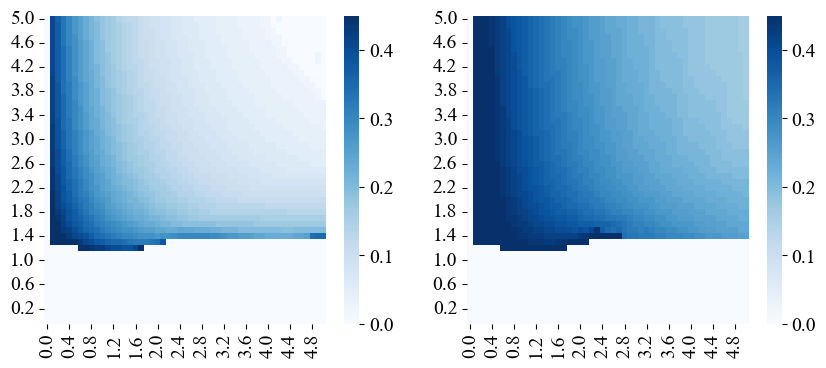

In [16]:
df_t1_sorted = df_t1.sort_index(ascending=False)
df_t2_sorted = df_t2.sort_index(ascending=False)


fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(df_t1_sorted, ax=ax1, cmap='Blues', vmax=0.45, vmin=0)

ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(df_t2_sorted, ax=ax2, cmap='Blues', vmax=0.45, vmin=0)

plt.savefig('fig6_pk_t1_t2.png')

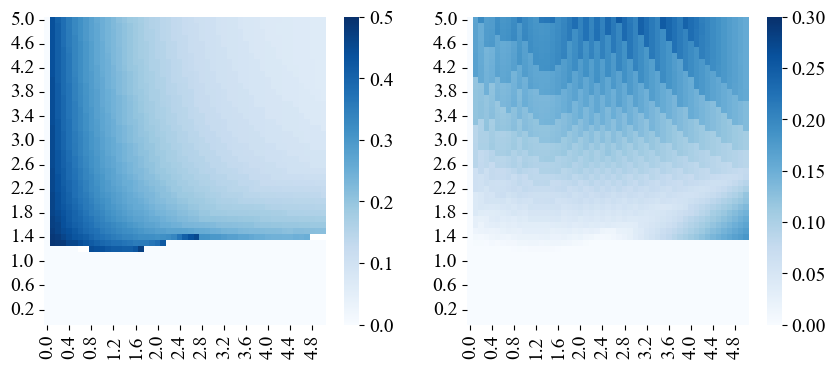

In [14]:
df_s_sorted = df_s.sort_index(ascending=False)
df_tbar_sorted = df_tbar.sort_index(ascending=False)

fig = plt.figure(figsize=(10, 4))


ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(df_tbar_sorted, ax=ax1, cmap='Blues', vmax=0.5, vmin=0)

ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(df_s_sorted, ax=ax2, cmap='Blues', vmax=0.3, vmin=0)

plt.savefig('fig5_pk_tbar_stotal.png')

In [17]:
# df_t1_sorted = df_t1.sort_index(ascending=False)
# # print(df_t1_sorted)
# plt.figure()
# sns.heatmap(df_t1_sorted, cmap='Blues')
# plt.savefig('heatmap0528_t1.png')
# plt.close('all')

In [18]:
# df_t2_sorted = df_t2.sort_index(ascending=False)
# # print(df_t1_sorted)
# plt.figure()
# sns.heatmap(df_t2_sorted, cmap='Blues')
# plt.savefig('heatmap0528_t2.png')
# plt.close('all')

In [19]:
# #他と一緒の設定
# df_s_sorted = df_s.sort_index(ascending=False)
# # print(df_t1_sorted)
# plt.figure()
# sns.heatmap(df_s_sorted, cmap='Blues')
# plt.savefig('heatmap0528_s.png')
# plt.close('all')

In [20]:
# #対数をとってみる,グラフの設定は他と一緒
# df_s_log = np.log(df_s_sorted)
# # print(df_t1_sorted)
# plt.figure()
# sns.heatmap(df_s_log, cmap='Blues')
# plt.savefig('heatmap0528_s_log.png')
# plt.close('all')

In [24]:
# plt.figure()
# sns.heatmap(df_s_sorted, cmap='Blues', vmax=0.2, vmin=0)
# plt.savefig('heatmap0528_s_color_bar.png')
# plt.close('all')

In [6]:
# # #Caliculate L(Vと要素数がずれている可能性あり)
# l = 1

# l_list = [l]
# t_list = [0]

# for i in range(len_t-1):
#     t = dt*(i+1)
#     t_list.append(t)
    
#     l = l_list[i]
#     h = h0_list[i]
#     v = v_list[i]
#     l1= l-(u+(h/(1+a*v)))*l*dt
    
#     l_list.append(l1)
    
# # print(l_list)

In [7]:
# fig = plt.figure(figsize=(1.414*25, 4))

# ax1 = fig.add_subplot(1, 6, 1) #1行4列の１番目
# ax1.plot(t_list, v_list, color = "black", label="v")
# # ax1.set_ylim([0,1.2])
# ax1.legend()

# ax2 = fig.add_subplot(1, 6, 2) #1行4列の１番目
# ax2.plot(t_list, s_list, color = "black", label="s")
# #ax1.set_ylim([0,1])
# ax2.legend()

# ax3 = fig.add_subplot(1, 6, 3) #1行4列の１番目
# ax3.plot(t_list, l_list, color = "black", label="l")
# ax3.set_ylim([0,1])
# ax3.legend()

# ax4 = fig.add_subplot(1, 6, 4) #1行4列の１番目
# ax4.plot(t2_list, lam_l_list, color = "black", label="lambda_l")
# # ax4.set_ylim([0,1])
# ax4.legend()

# ax5 = fig.add_subplot(1, 6, 5) #1行4列の１番目
# ax5.plot(t2_list, lam_v_list, color = "black", label="lambda_v")
# ax5.set_ylim([0,0.5])
# ax5.legend()

# ax6 = fig.add_subplot(1, 6, 6) #1行4列の１番目
# ax6.plot(t3_list, h0_list, color = "black", label="h")
# # ax6.set_ylim([0,1])
# ax6.legend()

# figname="a="+str(m)+",t1="+str(t1)+".png"
# plt.savefig(figname)

In [8]:
# fig = plt.figure(figsize=(1.414*20, 4))

# ax1 = fig.add_subplot(1, 4, 1)   #1行4列の１番目
# ax1.plot(t_list, s_list, color = "black", label="s")
# #ax1.set_ylim([0,1])
# ax1.legend()

# ax2 = fig.add_subplot(1, 4, 2)   #１行4列の２番目
# ax2.plot(t_list, lam_list, color = "black", label="lambda")
# #ax2.set_ylim([0,1])
# ax2.legend()

# ax3 = fig.add_subplot(1, 4, 3)   #1行4列の3番目
# ax3.plot(tt_list, l_list, color = "black", label="L")
# ax3.set_ylim([0,1])
# ax3.legend()

# ax4 = fig.add_subplot(1, 4, 4)   #１行4列の4番目
# ax4.plot(tt_list, v_list, color = "black", label="V")
# ax4.set_ylim([0,1])
# ax4.legend()

# plt.savefig("slamLV.png")